# Exam 6

## 1.
Consider a list of dictionaries, each of which contains clinical data of a certain
patient:
L = [{"patient_id": 1, "age": 12, "diagnosis": "measles", ...},
{"patient_id": 2, "age": 43, "diagnosis": "flu", ...},
...]

Using list comprehension build, starting from list L, a list that contains the “age” of
all the patients diagnosed with “flu”. Use a boxplot to visualize the distribution of the ages.


In [1]:
# create example list to check the code
L = [{"patient_id": 1, "age": 12, "diagnosis": "measles"},
     {"patient_id": 2, "age": 27, "diagnosis": "flu"},
     {"patient_id": 3, "age": 15, "diagnosis": "sore throat"},
     {"patient_id": 4, "age": 55, "diagnosis": "flu"},
     {"patient_id": 5, "age": 34, "diagnosis": "atypical angina"},
     {"patient_id": 6, "age": 22, "diagnosis": "flu"},
     {"patient_id": 7, "age": 43, "diagnosis": "flu"},
     {"patient_id": 8, "age": 16, "diagnosis": "migraine"},
     {"patient_id": 9, "age": 17, "diagnosis": "flu"}
     ]

In [4]:
import matplotlib.pyplot as plt #needed for data visualization

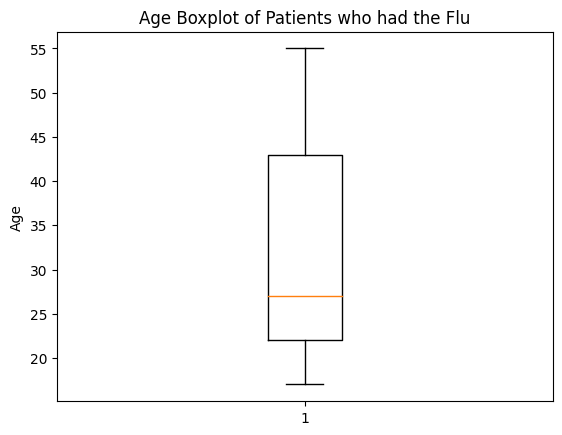

In [5]:
# for each dictionary in the list, add to "age_list" the 'age' value only if the corresponding 'diagnosis' value is 'flu`
age_list = [p['age'] for p in L if p['diagnosis'] == 'flu']

plt.boxplot(age_list)                                   # turn the list of age values into a boxplot object
plt.title('Age Boxplot of Patients who had the Flu')    # add a title to the boxplot
plt.ylabel('Age')                                       # add a label to the y-axis
plt.show()                                              # visualize the plot

# 2.
A codec encodes binary trees as nested tuples, as in the example figure. Write a recursive function that takes an instance of on encoded tree as input and returns the sum of all the numbers in the tree.

E.g.:
`c = (1,(2,3))` => `rec_sum_codec(c)` returns 6

Hint: you may use the condition: type(c) == int to test is the variable c is an integer.

In [6]:
def rec_sum_codec(c):
    if type(c) == int:                              # if the argument of the function is an integer, then
        return c                                    # the output is the integer itself
    else:                                               # if the argument is an iterable (list or tuple)
        if len(c) == 1:                                     # and it has length = 1, then
            return rec_sum_codec(c[0])                      # call the function on the first element of the iterable
        else: return rec_sum_codec(c[0]) + rec_sum_codec(c[1:]) # otherwise, the result is the sum funcion(first element) + function(list of other elements)

In [7]:
# try out the recursive function on an example codec
rec_sum_codec((1, (2, 3), (4, 5, 6, (7, 8, 9, (10, 11, (13))))))

79

# 3.
Implement a class `BankAccount`, which contains the total wealth of the owner (amount of euros). When a `BankAccount` is created, it is possible to define the initial wealth, but it must not be negative. Furthermore it provides a method `deposit(N)` to add an amount of N euros, `withdraw(N)` to withdraw N euros and `transfer(other_account, N)` to transfer N euros from the account to the `other_account`. If the account does not hold enough money to grant a withdraw or transfer operation, then a user-defined `BankAccountException` should be raised. Consider the class `LimitedBankAccount` identical to the previous but with the limitation that the maximum amount that the user can withdraw is 100 euros. Show how to design it as a specialization of the former.

In [64]:
# define `BanckccountException`
class BankAccountException(Exception):
    def __init__( self, msg):
        self.message = msg

In [65]:
class BankAccount:
    def __init__(self, ownerID, initial_balance):
        self.id = ownerID
        if initial_balance >= 0:                                            #check that initial balance is not negative
            self.balance = initial_balance
        else:                                                               # otherwise, raise BankAccountException
            raise BankAccountException('Balance cannot be negative')

    def deposit(self, N):                                                   # define `deposit` method
        self.balance += N                                                   # adds N to the balance

    def withdraw(self, N):                                                  # define `withdraw` method
        if self.balance >= N:                                               # if balance is greater than N, then
            self.balance -= N                                                   # subracts N to the balance
        else:
            raise BankAccountException('Balance cannot be negative')        # otherwise, raise BankAccountException

    def transfer(self, other_account, N):                                   # define `transfer` method
        if self.balance >= N:                                               # if balance is greater than N, then
            self.balance -= N                                                   # subtracts N to the balance of the current account
            other_account.balance += N                                          # adds N to the balance of `other_account`
        else:
            raise BankAccountException('Balance cannot be negative')        # otherwise, raise BankAccountException

class LimitedBankAccount(BankAccount):                  # define class LimitedBankAccount which inherits the characteristics of class BankAccount
    def withdraw(self, N):                              # define new `withdraw` method:
        if N <= 100:                                    # if N is not more than 100, then
            super().withdraw(N)                             # apply the method `withdraw` of parent class BankAccount
        else:
            raise Exception('Cannot withdraw more than 100 euros from LimitedBankAccount') # otherwise, raise Exception

In [66]:
a1 = BankAccount('Alex', 500)           # creating a BankAccount object
a2 = BankAccount('Lori', 100)           # creating another BankAccount object
a1.deposit(500)                         # applying method `deposit` on the first object
print(a1.balance)                       # checking the balance of the first object
a1.withdraw(300)                        # applying method `withdraw`
print(a1.balance)
a1.transfer(a2, 50)                     # applying method `transfer` on the first object to the second one
print(a1.balance, a2.balance)           # checking the balances
a1.withdraw(660)                        # trying to withdraw an amount greater than the balance

1000
700
650 150


BankAccountException: 

In [63]:
la1 = LimitedBankAccount('Anna', 400)       # creating a LimitedBankAccount object
la1.deposit(600)
print(la1.balance)
la1.withdraw(100)
print(la1.balance)
la1.withdraw(150)                           # trying to withdraw more than 100 to a LimitedBankAccount object

1000
900


Exception: Cannot withdraw more than 100 euros from LimitedBankAccount

## 4.
Consider a file `my_gwas.csv`, with the following structure:
`id,donor,SNP,trait`
`1,p001,rs023,opioid dependence`
`2,p001,rs209,lactose intolerance`
`...`<br>

Write a piece of software that
(a) skips the first header line,
(b) reads and parses each line,
(c) check the correctness of the donor and SNP IDs. with regular expression,
(d) computes a list of pairs `GWAS = [(SNP1, trait1), (SNP2, trait2), ...]`,
(e) writes the list in an output file `output.csv`, where each pair corresponds to a line.

*Donor id must start with "p" or "d" and there must be a number, SNP starts with "rs" then a number with at least 3 digits.*

In [50]:
# writing a file to use as example
with open('my_gwas.csv', 'w') as rf:
    rf.write('''id,donor,SNP,trait
1,p001,rs876,opioid dependence
2,p001,rs209,lactose intolerance
3,d001,rs123, malaria resistance
4,r002,rs768,lactose intolerance
5,p002,rs209,anemia
6,p003,rs09,green eyes
7,p004,rs073,opioid dependence
8,p005,rs209,green eyes
9,p006,rs123,opioid dependence
10,p006,rs455,lactose intolerance
''')

In [51]:
import re   #needed for regular expression

In [55]:
with open('my_gwas.csv', 'r') as rf:        # open the file in read mode
    rf.readline()                           # skip first line (header)
    lines = rf.readlines()                  # save the list of lines
    GWAS = []                               # create empty GWAS list
    for i in range(len(lines)):                 # iterate over each line (indeces)
        line = lines[i].strip().split(',')      # remove newlines and split into a list of strings which formed the line of the file
        if not re.search(r'^[pd]\d+$', line[1]):    # check correctness of donor IDs
            print(f'Not valid donor ID for line {i}')
        elif not re.search(r'^rs\d{3,}$', line[2]): # check correctnes of SNP IDs
            print(f'Not valid SNP ID for line {i}')
        else:                                       # if both are correct; then
            if (line[2], line[3]) not in GWAS:          # if the couple (SNP ID, trait) are not already inside GWAS list, then
                GWAS.append((line[2], line[3]))             # insert the couple into GWAS list

with open('gwas_output.csv', 'w') as wf:        # open a new file in write mode
    for pair in GWAS:                           # iterate over the elements of GWAS list
        wf.write(f'{pair[0]}, {pair[1]}\n')     # write each element in a new line of the file

Not valid donor ID for line 3
Not valid SNP ID for line 5


## 5.
Consider the list generated in the Exercise 4, e.g.,:
`GWAS = [("rs023","opioid dependence”), ("rs209","lactose intolerance”), ...]`<br>
Write a piece of software that identifies the SNP (rsID) which is associated to the largest set of distinct traits.

In [56]:
# create empty dictionary to be filled with [SNP ID: number of different traits associated to it]
SNP_dict = {}
for pair in GWAS:                   # iterate over elements (pairs) of GWAS list
    if pair[0] not in SNP_dict:     # if the first element of the pair (the SNP ID) is not one of the dictionary keys, then
        SNP_dict[pair[0]] = 1           # insert it into the dictionary and set its value to 1
    else:
        SNP_dict[pair[0]] += 1      # otherwise (if it was already in the dictionary), increase its value by 1

# find the maximum of all the counts of traits associated to each SNP
max_count = 0                   # set an initial `maximum` to 0
for k, v in SNP_dict.items():   # iterate over the elements of the dictionary
    if v > max_count:               # if the value (count) of the SNP is greater than the current maximum, then
        max_count = v                   # change the current maximum into the new value found

# get the result
for k, v in SNP_dict.items():       # iterate again over the elements of the dictionary
    if v == max_count:              # if the value is equal to the found maximum, then print the SNP ID and the corresponding value
        print(f'Highest associated SNP: {k}\nNumber of associated traits: {v}')

Highest associated SNP: rs209
Number of associated traits: 3
